In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# adjust the path accordingly
df = pd.read_csv('admission_data_final.csv')
data = df.copy()
data = data.set_index("id_student")

In [ ]:
from sklearn.model_selection import train_test_split
# train > test -> 80:20, 75:25, 70:30, train > test
train, test = train_test_split(data, test_size = 0.2, train_size=0.8, random_state=42)

In [ ]:
# Handling Drop Duplicated
train = train.drop_duplicates()
test = test.drop_duplicates()

In [ ]:
# percentage version in data train
total_rows = len(train)

# Menghitung dan menampilkan persentase missing values di setiap kolom pada data train
for column in train.columns:
    missing_count = train[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'gre_score' Has 6 missing values (1.49%)
Column 'toefl_score' Has 6 missing values (1.49%)
Column 'univ_ranking' Has 6 missing values (1.49%)
Column 'motiv_letter_strength' Has 2 missing values (0.50%)
Column 'recommendation_strength' Has 3 missing values (0.75%)
Column 'gpa' Has 3 missing values (0.75%)
Column 'research_exp' Has 0 missing values (0.00%)
Column 'admit_status' Has 0 missing values (0.00%)
Column 'gender' Has 0 missing values (0.00%)
Column 'education' Has 0 missing values (0.00%)
Column 'final_score' Has 0 missing values (0.00%)


In [ ]:
# percentage version in data test
total_rows_test = len(test)

# Menghitung dan menampilkan persentase missing values di setiap kolom pada data train
for column in test.columns:
    missing_count = test[column].isna().sum()
    missing_percentage = (missing_count / total_rows_test) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'gre_score' Has 3 missing values (2.97%)
Column 'toefl_score' Has 2 missing values (1.98%)
Column 'univ_ranking' Has 1 missing values (0.99%)
Column 'motiv_letter_strength' Has 0 missing values (0.00%)
Column 'recommendation_strength' Has 3 missing values (2.97%)
Column 'gpa' Has 1 missing values (0.99%)
Column 'research_exp' Has 0 missing values (0.00%)
Column 'admit_status' Has 0 missing values (0.00%)
Column 'gender' Has 0 missing values (0.00%)
Column 'education' Has 0 missing values (0.00%)
Column 'final_score' Has 0 missing values (0.00%)


In [ ]:
# Handling the missing value
# Pisahkan kolom numerik dan object
num_cols = train.select_dtypes(include=["int64", "float64"]).columns
obj_cols = train.select_dtypes(include=["object"]).columns

# Imputasi numerik (pakai median dari train)
for col in num_cols:
    median_val = train[col].median()
    train[col] = train[col].fillna(median_val)
    test[col] = test[col].fillna(median_val)

# Imputasi object (pakai modus dari train)
for col in obj_cols:
    mode_val = train[col].mode().iloc[0]
    train[col] = train[col].fillna(mode_val)
    test[col] = test[col].fillna(mode_val)

# Cek hasil
print("Missing values train:\n", train.isna().sum())
print("Missing values test:\n", test.isna().sum())

Missing values train:
 gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
gender                     0
education                  0
final_score                0
dtype: int64
Missing values test:
 gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
gender                     0
education                  0
final_score                0
dtype: int64


In [ ]:
train.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,final_score
id_student,,,,,,,,,,,
STD1075,329.0,114.0,2.0,2.0,4.0,8.56,yes,1,male,bachelor,856
STD1442,331.0,116.0,4.0,4.5,4.5,9.44,yes,1,female,bachelor,934
STD1015,314.0,105.0,3.0,3.5,2.5,8.30,no,0,female,bachelor,500
STD1325,326.0,116.0,3.0,3.5,4.0,9.14,yes,1,female,bachelor,896
STD1388,296.0,97.0,2.0,1.5,2.0,7.80,no,0,male,master,362


In [ ]:
import pandas as pd

# --- Handling categorical encoding ---

# label encoding for ordinal category
train["research_exp"] = train["research_exp"].str.lower().map({"yes": 1, "no": 0})
test["research_exp"] = test["research_exp"].str.lower().map({"yes": 1, "no": 0})

# OHE for nominal category
train = pd.get_dummies(train, columns=["gender"])
test = pd.get_dummies(test, columns=["gender"])

# 3. education -> ordinal encoding (bachelor=1, master=2)
edu_map = {"bachelor": 1, "master": 2}
train["education"] = train["education"].str.lower().map(edu_map)
test["education"] = test["education"].str.lower().map(edu_map)

In [ ]:
train.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,education,final_score,gender_female,gender_male
id_student,,,,,,,,,,,,
STD1075,329.0,114.0,2.0,2.0,4.0,8.56,1,1,1,856,False,True
STD1442,331.0,116.0,4.0,4.5,4.5,9.44,1,1,1,934,True,False
STD1015,314.0,105.0,3.0,3.5,2.5,8.30,0,0,1,500,True,False
STD1325,326.0,116.0,3.0,3.5,4.0,9.14,1,1,1,896,True,False
STD1388,296.0,97.0,2.0,1.5,2.0,7.80,0,0,2,362,False,True


# Feature Selection Regresi - Mutual Information

In [ ]:
# =========================================================
# 1) FEATURE SELECTION (Mutual Information)
# =========================================================
X_train_full = train.drop(columns=["admit_status", "final_score"])
y_train = train["final_score"]

X_test_full = test.drop(columns=["admit_status", "final_score"])
y_test = test["final_score"]

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import numpy as np

# Hitung mutual information antara setiap fitur dan target
mi_scores = mutual_info_regression(X_train_full, y_train, random_state=42)

# Masukkan ke DataFrame untuk lebih mudah dibaca
mi_scores = pd.Series(mi_scores, index=X_train_full.columns).sort_values(ascending=False)
print("Mutual Information Scores Regression:")
print(mi_scores)

Mutual Information Scores Regression:
gpa                        0.909194
gre_score                  0.789949
toefl_score                0.670516
motiv_letter_strength      0.493322
recommendation_strength    0.330873
univ_ranking               0.321985
research_exp               0.154483
education                  0.023516
gender_male                0.021722
gender_female              0.018932
dtype: float64


### Kita bisa memilih nilai > 0, pada nilai terkecilnya ialah gender_female nilainya hanya 1,8%

In [ ]:
selected_features_reg = mi_scores[mi_scores > 0].index.tolist()
print("Selected features for regression:", selected_features_reg)

# # Dataset dengan fitur terpilih pada train dan test
X_train_reg = X_train_full[selected_features_reg]
X_test_reg = X_test_full[selected_features_reg]

Selected features for regression: ['gpa', 'gre_score', 'toefl_score', 'motiv_letter_strength', 'recommendation_strength', 'univ_ranking', 'research_exp', 'education', 'gender_male', 'gender_female']


# Regresi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# =========================================================
# 1) BASELINE MODEL
# =========================================================

# X_train_reg dan X_test_reg dari hasil feature selection
# --- Range skor final berdasarkan data train ---
score_min, score_max = data['final_score'].min(), data['final_score'].max()
score_range = score_max - score_min

# --- Model ---
model_reg = DecisionTreeRegressor(random_state=42, max_depth=None)
model_reg.fit(X_train_reg, y_train)

# prediksi train & test
y_pred_train = model_reg.predict(X_train_reg)
y_pred_test = model_reg.predict(X_test_reg)

# metrics r-square
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# hitung persentase error relatif terhadap range skor final
rmse_train_pct = (rmse_train / score_range) * 100
rmse_test_pct = (rmse_test / score_range) * 100

# --- Hasil evaluasi model train dan test ---
results_baseline = pd.DataFrame([{
    "Model": "DecisionTreeRegressor Baseline",
    "R2_Train": r2_train,
    "R2_Test": r2_test,
    "RMSE_Train": rmse_train,
    "RMSE_Test": rmse_test,
    "RMSE_Train_%": rmse_train_pct,
    "RMSE_Test_%": rmse_test_pct,
    "FinalScore_Min": score_min,
    "FinalScore_Max": score_max
}])

results_baseline

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,RMSE_Train_%,RMSE_Test_%,FinalScore_Min,FinalScore_Max
0,DecisionTreeRegressor Baseline,1.0,0.599731,0.0,132.78528,0.0,18.969326,300,1000


In [ ]:
# =========================================================
# 2) TUNNED MODEL - Using GridSearchCV
# =========================================================

from sklearn.model_selection import GridSearchCV

# parameter for hyperparameter tunning
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

# Grid search
grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42), # model
    param_grid, # parameter
    cv=5, # cross validation
    scoring="r2", # metrics to maximize : r-square
)

grid.fit(X_train_reg, y_train) # training model with gridsearch

print("Best params:", grid.best_params_) # best parameter model after hyperparameter tunning
print("Best CV R2:", grid.best_score_) # best score after gridsearch


Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV R2: 0.6496547806144203


In [ ]:
best_reg = grid.best_estimator_ # Best parameter model

# =========================================================
# 2) TUNED MODEL (best_reg dari GridSearchCV)
# =========================================================
y_pred_train = best_reg.predict(X_train_reg)
y_pred_test = best_reg.predict(X_test_reg)

# Metrics evaluation model - R-square, RMSE in train and test
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# percentage RMSE
rmse_train_pct = (rmse_train / score_range) * 100
rmse_test_pct = (rmse_test / score_range) * 100

# --- Hasil evaluasi model di train dan test setelah gridsearch ---
results_grid = pd.DataFrame([{
    "Model": "DecisionTreeRegressor GridSearchCV",
    "R2_Train": r2_train,
    "R2_Test": r2_test,
    "RMSE_Train": rmse_train,
    "RMSE_Test": rmse_test,
    "RMSE_Train_%": rmse_train_pct,
    "RMSE_Test_%": rmse_test_pct,
    "FinalScore_Min": score_min,
    "FinalScore_Max": score_max
}])
results_grid

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,RMSE_Train_%,RMSE_Test_%,FinalScore_Min,FinalScore_Max
0,DecisionTreeRegressor GridSearchCV,0.772939,0.731954,100.321975,108.66213,14.331711,15.523161,300,1000


In [ ]:
# =========================================================
# 3) TUNED MODEL - Using RandomizedSearchCV
# =========================================================
from sklearn.model_selection import RandomizedSearchCV

# parameter model
param_dist = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"]
}

# randomsearch hyperparameter tunning
rand = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42), # model decision tree
    param_distributions=param_dist, # parameter
    n_iter=20,              # jumlah kombinasi yang diuji (lebih kecil = lebih cepat)
    cv=5, # cross validation
    scoring="r2", # Scoring
    random_state=42
)

rand.fit(X_train_reg, y_train)

print("Best params (Randomized):", rand.best_params_)
print("Best CV R2 (Randomized):", rand.best_score_)


Best params (Randomized): {'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
Best CV R2 (Randomized): 0.6594757059676978


In [ ]:
best_rand = rand.best_estimator_ # Best parameter model

# prediksi train & test
y_pred_train_rand = best_rand.predict(X_train_reg)
y_pred_test_rand = best_rand.predict(X_test_reg)

# Metrics evaluation model - R-square, RMSE in train and test
r2_train_rand = r2_score(y_train, y_pred_train_rand)
r2_test_rand = r2_score(y_test, y_pred_test_rand)
rmse_train_rand = np.sqrt(mean_squared_error(y_train, y_pred_train_rand))
rmse_test_rand = np.sqrt(mean_squared_error(y_test, y_pred_test_rand))

# Metrics evaluation model percentage in RMSE
rmse_train_pct_rand = (rmse_train_rand / score_range) * 100
rmse_test_pct_rand = (rmse_test_rand / score_range) * 100

# Hasil evaluasi model
results_rand = pd.DataFrame([{
    "Model": "DecisionTreeRegressor Randomized",
    "R2_Train": r2_train_rand,
    "R2_Test": r2_test_rand,
    "RMSE_Train": rmse_train_rand,
    "RMSE_Test": rmse_test_rand,
    "RMSE_Train_%": rmse_train_pct_rand,
    "RMSE_Test_%": rmse_test_pct_rand,
    "FinalScore_Min": score_min,
    "FinalScore_Max": score_max
}])
results_rand

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,RMSE_Train_%,RMSE_Test_%,FinalScore_Min,FinalScore_Max
0,DecisionTreeRegressor Randomized,0.766007,0.686377,101.841882,117.537871,14.54884,16.791124,300,1000


In [ ]:
# =========================================================
# 3) COMBINE RESULTS
# =========================================================
results_all = pd.concat([results_baseline, results_grid, results_rand], ignore_index=True)
results_all

,Model,R2_Train,R2_Test,RMSE_Train,RMSE_Test,RMSE_Train_%,RMSE_Test_%,FinalScore_Min,FinalScore_Max
0,DecisionTreeRegressor Baseline,1.000000,0.599731,0.000000,132.785280,0.000000,18.969326,300,1000
1,DecisionTreeRegressor GridSearchCV,0.772939,0.731954,100.321975,108.662130,14.331711,15.523161,300,1000
2,DecisionTreeRegressor Randomized,0.766007,0.686377,101.841882,117.537871,14.548840,16.791124,300,1000


## Interpretasi Hasil Evaluasi Model – Decision Tree Regressor

Rentang skor final pada data adalah **300 – 1000**, sehingga total range = **700 poin**.  
Semua nilai error (RMSE) di bawah ini dapat dipahami sebagai rata-rata selisih prediksi terhadap skor sebenarnya.

---

### Hasil Evaluasi (Test Set)

| Model                              | R² Train | R² Test | RMSE Train | RMSE Test | RMSE Train % | RMSE Test % | Catatan |
|------------------------------------|----------|---------|------------|-----------|--------------|-------------|---------|
| DecisionTreeRegressor Baseline     | 1.000    | 0.600   | 0.0        | 132.8     | 0.00%        | 18.97%      | **Overfit parah**: sempurna di train, buruk di test |
| DecisionTreeRegressor GridSearchCV | 0.773    | 0.732   | 100.3      | 108.7     | 14.33%       | 15.52%      | Jauh lebih seimbang, generalisasi terbaik |
| DecisionTreeRegressor Randomized   | 0.766    | 0.686   | 101.8      | 117.5     | 14.55%       | 16.79%      | Masih cenderung overfit, test lebih buruk dari GridSearch |

---

### Analisis
- **Baseline Decision Tree**: overfitting jelas terlihat → R² Train = 1.0, tapi R² Test hanya 0.600. Model terlalu kompleks (max_depth=None) sehingga menghapal data train.  
- **GridSearchCV**: hasil paling seimbang → meski R² Train turun (0.773), R² Test meningkat (0.732). RMSE Test juga lebih rendah (108.7 poin, ~15.5% dari range). Ini menunjukkan generalisasi terbaik.  
- **RandomizedSearchCV**: meski R² Train relatif tinggi (0.766), R² Test lebih rendah (0.686), dengan RMSE Test lebih besar (117.5 poin). Performanya tidak sebaik GridSearch.  

---

### Kesimpulan
- **Model terbaik: DecisionTreeRegressor dengan GridSearchCV**  
  → memberikan keseimbangan optimal antara train dan test (generalization).  
- **Baseline** terlalu overfit.  
- **RandomizedSearchCV** cukup baik, tetapi tidak lebih baik dari GridSearch.  


### Tree Visualization - Regresi
Aturan prediksi yang dibuat model, sehingga kita memahami proses dibelakang model.

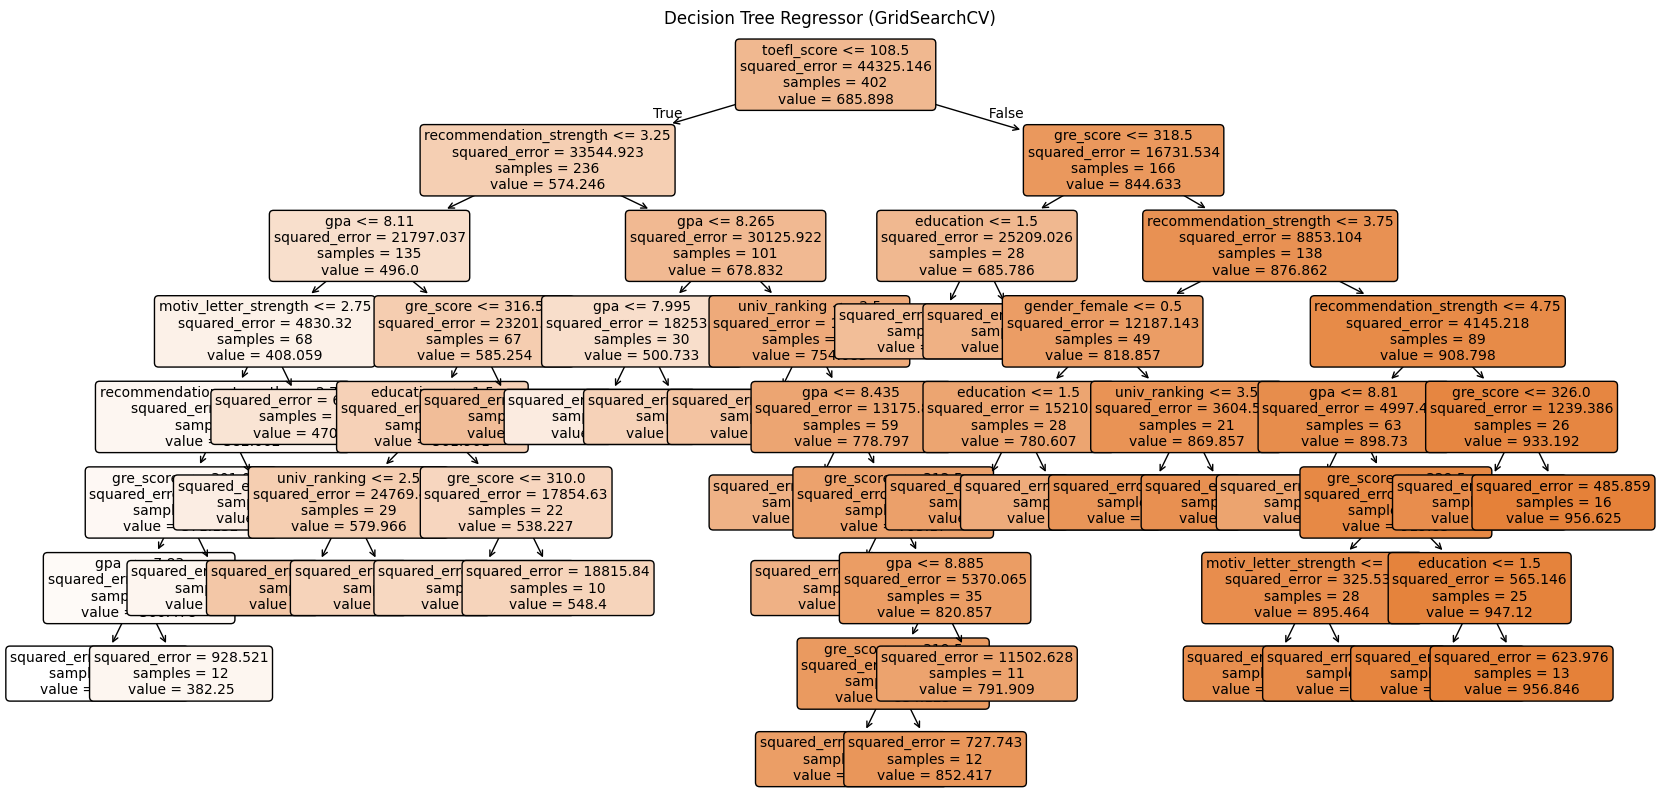

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    best_reg,  # pakai model tuned, misalnya GridSearchCV
    feature_names=X_train_reg.columns, # Feature X
    filled=True, # Fill value
    rounded=True, # pembulatan
    fontsize=10 # size
)
plt.title("Decision Tree Regressor (GridSearchCV)")
plt.show()

## Cara Membaca Pohon Keputusan (Regresi)

Pohon ini dibuat untuk **memprediksi skor akhir (final score) mahasiswa**.

Setiap **kotak (node)** adalah sebuah aturan berbasis fitur (misalnya `gpa <= 8.235`).

**Jalurnya**:  
- Mulai dari **atas (root node)** → ikuti pertanyaan *True/False* → turun ke kiri (True) atau kanan (False).  
- Terus ikuti sampai ke **kotak paling bawah (leaf node)** → di situ ada **nilai prediksi (value)**.

---

## Elemen Kotak

Contoh isi kotak:


Artinya:
- **gpa <= 8.235** → aturan yang dicek. Kalau iya (True) turun kiri, kalau tidak (False) turun kanan.  
- **samples = 169** → ada 169 mahasiswa yang datanya masuk ke node ini.  
- **value = 551.3** → rata-rata skor akhir dari kelompok ini (nilai prediksi kalau berhenti di sini).  
- **squared_error** → seberapa bervariasi data di node itu (semakin kecil semakin homogen).  

---

## Inti Interpretasi (dari pohonmu)

- **Akar (root node):**  
  Pertanyaan pertama adalah apakah `recommendation_strength ≤ 3.25`?  
  - Jika **iya** → rata-rata skor lebih rendah (sekitar 551–673).  
  - Jika **tidak** → skor cenderung lebih tinggi (sekitar 783–908).  
  → Artinya, **kekuatan rekomendasi** punya pengaruh besar di awal.

- **Cabang kiri (recommendation_strength rendah):**  
  Prediksi skor akhir lebih banyak dipengaruhi oleh **GPA dan TOEFL/GRE**.  
  Misalnya, kalau GPA rendah (< 7.91) dan motivasi juga rendah, prediksi skor bisa serendah 385.  

- **Cabang kanan (recommendation_strength tinggi):**  
  GPA tinggi (≥ 8.41) dan GRE tinggi (≥ 318) bisa mendorong prediksi ke arah **850–927**.  
  → Kombinasi **rekomendasi kuat + GPA tinggi + GRE tinggi** memberi prediksi skor terbaik.  

- **Fitur dominan:**  
  Dari jalur utama terlihat fitur yang paling sering dipakai:  
  - Recommendation strength  
  - GPA  
  - GRE score  
  - TOEFL & Motivation letter (kadang muncul di level lebih bawah)  

---

## Ringkasannya

1. **Setiap kotak adalah pertanyaan** tentang satu fitur (contoh: GPA tinggi atau rendah?).  
2. **Jalur kiri = True**, **jalur kanan = False**.  
3. **Kotak akhir (leaf)** berisi nilai prediksi skor akhir.  
4. Dari pohon ini kita bisa lihat:  
   - Mahasiswa dengan **rekomendasi kuat + GPA bagus + GRE tinggi** → prediksi skor sangat tinggi (850–927).  
   - Mahasiswa dengan **rekomendasi lemah + GPA rendah** → prediksi skor rendah (sekitar 385–500).  
5. Jadi pohon ini membantu menjelaskan **faktor apa yang paling berpengaruh pada skor akhir**.  


# Feature Selection Klasifikasi  - Mutual Information

In [ ]:
# =========================================================
# 1) FEATURE SELECTION (Mutual Information for Classification)
# =========================================================
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np

# --- Data train dan test ---
X_train_clf = train.drop(columns=["admit_status", "final_score"])
y_train_clf = train["admit_status"]

X_test_clf = test.drop(columns=["admit_status", "final_score"])
y_test_clf = test["admit_status"]

# --- Hitung mutual information ---
mi_scores_clf = mutual_info_classif(X_train_clf, y_train_clf, random_state=42)
mi_series_clf = pd.Series(mi_scores_clf, index=X_train_clf.columns).sort_values(ascending=False)
print("Mutual Information Scores (Classification):")
print(mi_series_clf)

Mutual Information Scores (Classification):
gpa                        0.312173
gre_score                  0.285248
toefl_score                0.223780
motiv_letter_strength      0.197436
univ_ranking               0.171367
recommendation_strength    0.161779
research_exp               0.082736
education                  0.019392
gender_female              0.000000
gender_male                0.000000
dtype: float64


Pilih fitur penting (threshold > 0.01 misalnya)

In [ ]:
# --- Pilih fitur penting (threshold > 0.01 misalnya) ---
selected_features_clf = mi_series_clf[mi_series_clf > 0].index.tolist()
print("Selected features:", selected_features_clf)

# data after feature selection
X_train_clf = X_train_clf[selected_features_clf]
X_test_clf = X_test_clf[selected_features_clf]

Selected features: ['gpa', 'gre_score', 'toefl_score', 'motiv_letter_strength', 'univ_ranking', 'recommendation_strength', 'research_exp', 'education']


# Klasifikasi

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# =========================================================
# 2) BASELINE MODEL
# =========================================================
base_clf = DecisionTreeClassifier(random_state=42)
base_clf.fit(X_train_clf, y_train_clf)

y_pred_train = base_clf.predict(X_train_clf)
y_pred_test = base_clf.predict(X_test_clf)

# Evaluasi helper
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return pd.DataFrame([{
        "Model": model_name,
        "Accuracy_Train": accuracy_score(y_train, y_pred_train),
        "Accuracy_Test": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1": f1_score(y_test, y_pred_test)
    }])

# hasil evaluasi model
results_baseline_clf = evaluate_model(base_clf, X_train_clf, y_train_clf, X_test_clf, y_test_clf, "DecisionTreeClassifier Baseline")
results_baseline_clf

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall,F1
0,DecisionTreeClassifier Baseline,1.0,0.831683,0.870968,0.857143,0.864


In [ ]:
# =========================================================
# 3) GRID SEARCH
# =========================================================
param_grid_clf = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

# Grid search
grid_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42), # model
    param_grid_clf, # parameter
    cv=5, # cross validation
    scoring="accuracy", # score for maximize evaluation metrics models
)

# training with gridsearch parameter
grid_clf.fit(X_train_clf, y_train_clf)
print("Best params (GridSearchCV):", grid_clf.best_params_)
print("Best CV Accuracy:", grid_clf.best_score_)

best_grid_clf = grid_clf.best_estimator_ # Best parameter model

# results gridsearch
results_grid_clf = evaluate_model(best_grid_clf, X_train_clf, y_train_clf, X_test_clf, y_test_clf, "DecisionTreeClassifier GridSearchCV")
results_grid_clf

Best params (GridSearchCV): {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20}
Best CV Accuracy: 0.8433641975308641


,Model,Accuracy_Train,Accuracy_Test,Precision,Recall,F1
0,DecisionTreeClassifier GridSearchCV,0.870647,0.841584,0.885246,0.857143,0.870968


In [ ]:
# =========================================================
# 4) RANDOMIZED SEARCH
# =========================================================
# parameter model
param_dist_clf = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": np.arange(2, 21),
    "min_samples_leaf": np.arange(1, 21),
    "max_features": [None, "sqrt", "log2"]
}

# randomized search
rand_clf = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42), # model decision tree
    param_distributions=param_dist_clf, # parameter model
    n_iter=30, # iterasi
    cv=5, # cross validation
    scoring="accuracy", # score matrics evaluation
)

# training model with randomsearch
rand_clf.fit(X_train_clf, y_train_clf)
print("Best params (RandomizedSearchCV):", rand_clf.best_params_)
print("Best CV Accuracy:", rand_clf.best_score_)

best_rand_clf = rand_clf.best_estimator_ # Best parameter model

# results model
results_rand_clf = evaluate_model(best_rand_clf, X_train_clf, y_train_clf, X_test_clf, y_test_clf, "DecisionTreeClassifier RandomizedSearchCV")
results_rand_clf

Best params (RandomizedSearchCV): {'min_samples_split': np.int64(18), 'min_samples_leaf': np.int64(7), 'max_features': None, 'max_depth': 3}
Best CV Accuracy: 0.8433024691358024


,Model,Accuracy_Train,Accuracy_Test,Precision,Recall,F1
0,DecisionTreeClassifier RandomizedSearchCV,0.865672,0.841584,0.861538,0.888889,0.875


In [ ]:
# =========================================================
# 5) COMBINE RESULTS
# =========================================================
results_all_clf = pd.concat([results_baseline_clf, results_grid_clf, results_rand_clf], ignore_index=True)
print(results_all_clf)

                                       Model  Accuracy_Train  Accuracy_Test  \
0            DecisionTreeClassifier Baseline        1.000000       0.831683   
1        DecisionTreeClassifier GridSearchCV        0.870647       0.841584   
2  DecisionTreeClassifier RandomizedSearchCV        0.865672       0.841584   

   Precision    Recall        F1  
0   0.870968  0.857143  0.864000  
1   0.885246  0.857143  0.870968  
2   0.861538  0.888889  0.875000  


In [ ]:
data['admit_status'].value_counts(normalize=True)

,proportion
admit_status,
1,0.574257
0,0.425743


## Interpretasi Hasil Evaluasi Model – Decision Tree Classifier

Proporsi target:  
- Class 1 (diterima) = **57.4%**  
- Class 0 (tidak diterima) = **42.6%**  

Distribusi target cukup seimbang, sehingga metrik akurasi masih relevan. Namun tetap penting melihat precision, recall, dan F1 untuk gambaran performa yang lebih lengkap.  

---

### Hasil Evaluasi (Test Set)

| Model                                    | Accuracy Train | Accuracy Test | Precision | Recall | F1 Score | Catatan |
|------------------------------------------|----------------|---------------|-----------|--------|----------|---------|
| DecisionTreeClassifier Baseline          | 1.000          | 0.832         | 0.871     | 0.857  | 0.864    | **Overfit**: train sempurna (100%) tapi test menurun; generalisasi kurang baik |
| DecisionTreeClassifier GridSearchCV      | 0.871          | 0.842         | 0.885     | 0.857  | 0.871    | Generalisasi lebih baik, metrik seimbang, stabil di test set |
| DecisionTreeClassifier RandomizedSearchCV| 0.866          | 0.842         | 0.862     | 0.889  | 0.875    | Recall tertinggi (bagus untuk meminimalkan false negative), performa mirip GridSearch |

---

### Analisis
- **Baseline** jelas overfit: akurasi train 100% tapi test drop ke 83.2%.  
- **GridSearchCV** menemukan parameter optimal sehingga model lebih seimbang, akurasi test tertinggi (84.2%) dengan precision & recall yang cukup baik.  
- **RandomizedSearchCV** menghasilkan recall paling tinggi (88.9%), artinya lebih banyak kasus "diterima" yang benar-benar terdeteksi, walaupun precision sedikit lebih rendah dibanding GridSearch.  

---

### Kesimpulan
- **Model terbaik secara umum: GridSearchCV** → karena memberikan hasil paling seimbang dengan generalisasi yang baik.  
- **Model alternatif: RandomizedSearchCV** → cocok jika tujuan utama adalah **meningkatkan recall** (mengurangi false negative).  
- **Baseline tidak disarankan** karena terlalu overfit.  


### Tree Visualization - Klasifikasi : Aturan prediksi yang dibuat model, sehingga kita memahami proses dibelakang model.

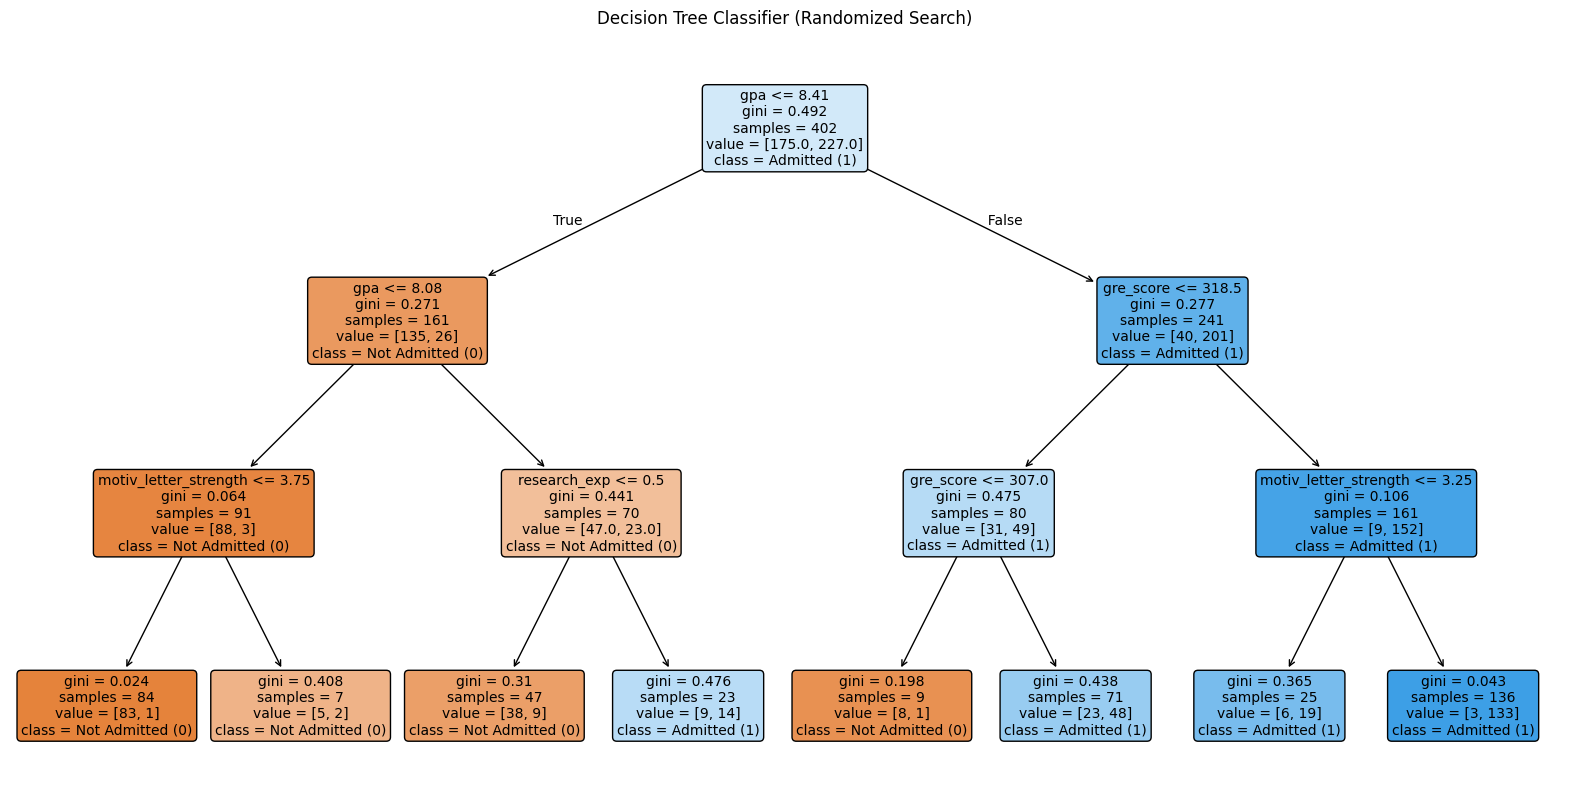

In [ ]:
# =========================================================
# 7) TREE VISUALIZATION - CLASSIFIER
# =========================================================
plt.figure(figsize=(20,10))
plot_tree(
    best_rand_clf,  # pakai model tuned classifier - Randomized Search
    feature_names=X_train_clf.columns, # X columns
    class_names=["Not Admitted (0)", "Admitted (1)"], # fitur class target (y)
    filled=True, # fill the value
    rounded=True, # pembulatan
    fontsize=10 # found size
)
plt.title("Decision Tree Classifier (Randomized Search)")
plt.show()

# Cara Membaca Pohon Keputusan (Klasifikasi)

Pohon ini dibuat untuk memprediksi **penerimaan mahasiswa (Admitted / Not Admitted)**.

---

## Jalur Dasar
- Mulai dari atas (**root node**).
- Ikuti pertanyaan → hasil **True** ke kiri, **False** ke kanan.
- Berhenti di **leaf node (kotak paling bawah)** → hasil prediksi kelas (`class`).

---

## Elemen Kotak

Contoh isi kotak:

- gpa <= 8.41
- gini = 0.492
- samples = 402
- value = [175, 227]
- class = Admitted (1)


Artinya:
- **gpa <= 8.41** → aturan yang diuji.
- **gini = 0.492** → impurity (0 = homogen, makin besar makin campur).
- **samples = 402** → jumlah data mahasiswa pada node ini.
- **value = [175, 227]** → distribusi kelas: 175 tidak diterima, 227 diterima.
- **class = Admitted (1)** → prediksi mayoritas di node ini.

---

## Inti Interpretasi Pohon

### Akar (Root Node)
- Pertanyaan pertama: **Apakah GPA ≤ 8.41?**
  - Jika **ya** → cenderung **Not Admitted**.
  - Jika **tidak** → cenderung **Admitted**.
  - → **GPA** adalah faktor paling dominan.

### Cabang Kiri (GPA rendah)
- Mahasiswa dengan **GPA rendah (≤ 8.08)** → mayoritas **Not Admitted**.
  - Jika motivasi juga rendah (≤ 3.75) → hampir pasti **Not Admitted**.
  - Jika punya pengalaman riset → peluang diterima sedikit meningkat.
- **Inti:** GPA rendah + motivasi rendah → kemungkinan besar **tidak diterima**.

### Cabang Kanan (GPA tinggi)
- Mahasiswa dengan **GPA tinggi (> 8.41)** → cenderung **Admitted**.
  - GRE menjadi faktor pembeda selanjutnya:
    - GRE ≤ 318.5 → masih cukup banyak yang diterima.
    - Jika GRE rendah, motivasi (≥ 3.25) bisa sangat membantu.
- **Inti:** GPA tinggi + GRE tinggi + motivasi kuat → peluang diterima sangat besar.

---

## Fitur Dominan
Dari jalur utama, fitur paling berpengaruh:
1. **GPA** (utama, pemisah pertama)
2. **GRE score**
3. **Motivation letter strength**
4. **Research experience** (efek terlihat di jalur GPA rendah)

---

## Ringkasan
- Setiap kotak = pertanyaan tentang satu fitur (GPA, GRE, motivasi, riset).
- Jalur kiri = True, jalur kanan = False.
- Leaf node = hasil prediksi (Admitted / Not Admitted).
- Dari pohon ini:
  - **GPA tinggi + GRE tinggi + motivasi kuat → kemungkinan diterima sangat tinggi.**
  - **GPA rendah + motivasi rendah → kemungkinan besar tidak diterima.**
